In [5]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns
import json
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
f = open('./settings.json')
settings = json.load(f)
f.close()

sampling_frequency = settings['sampling_frequency']
sampling_time = 1 / sampling_frequency
resampling_frequency = settings['resampling_frequency']
resampling_time = 1 / resampling_frequency

frequency_ratio = sampling_frequency / resampling_frequency

signal_duration = settings['signal_duration']

group = settings['group']
subject = settings['subject']
conditions = settings['conditions']
areas = list(settings['areas'].keys())
areas_labels = [settings['areas'][area]['label'] for area in areas]
n_channels = settings['n_channels']
n_stimuli = settings['n_stimuli']

bin_duration = settings['IFR_bin_duration']
trial_duration = settings['trial_duration']
trial_duration_view = settings['trial_duration_view']
trial_samples = np.floor(trial_duration_view * sampling_frequency).astype(np.int_)

In [7]:
# Settings
conditions_idx = 0
areas_idx = 0

In [8]:
data = loadmat(os.path.join('./output', group, subject, subject + '.mat'))
spike_trains = data['spike_trains']

[26 54]
[   26  3486  3596 14198 14239 14331 14366 14398 14438]
[26]
[ 27 609]
[ 9894 10836 13837]
[   27  1985  2130  2191  2226  2280  2330  2403  2946  3139  3168  7111
  7144  7232  7270  7304  7335  7362  7389  7415  7464  8217 13778 14511]
[   27    52    81  4161  4192  4225  4252  4277  4307  4357  4384  4440
  4492  4525  4904  4951  9233  9291  9318  9344  9375  9408  9464  9511
  9551  9625 10112 14305 14361 14387 14449 14475 14524 14561 14601 14679
 15179]
[]
[26]
[27]
[   26 16999]
[    4    51   152  4538  4575  4649  4692  4744  4778  4822  4873  4928
  4997  5639 10006 10038 10090 10132 10162 10187 10217 10249 10297 10322
 10780 11010 11064 15477 15529 15558 15584 15633 15659 15706 15743 15786
 16534 17185]
[]
[   27    56  1252  1300  1370  1414  1471  1506  1559  1589  1619  1703
  1742  6433  6475  6503  6540  6572  6611  6636  6669  6698  6741  7311
  7357  7388  7471 11745 11778 11828 11863 11892 11930 11958 11983 12065
 12580 12614 12681 12712 12777 17824 17887 17

IndexError: index -1 is out of bounds for axis 0 with size 0

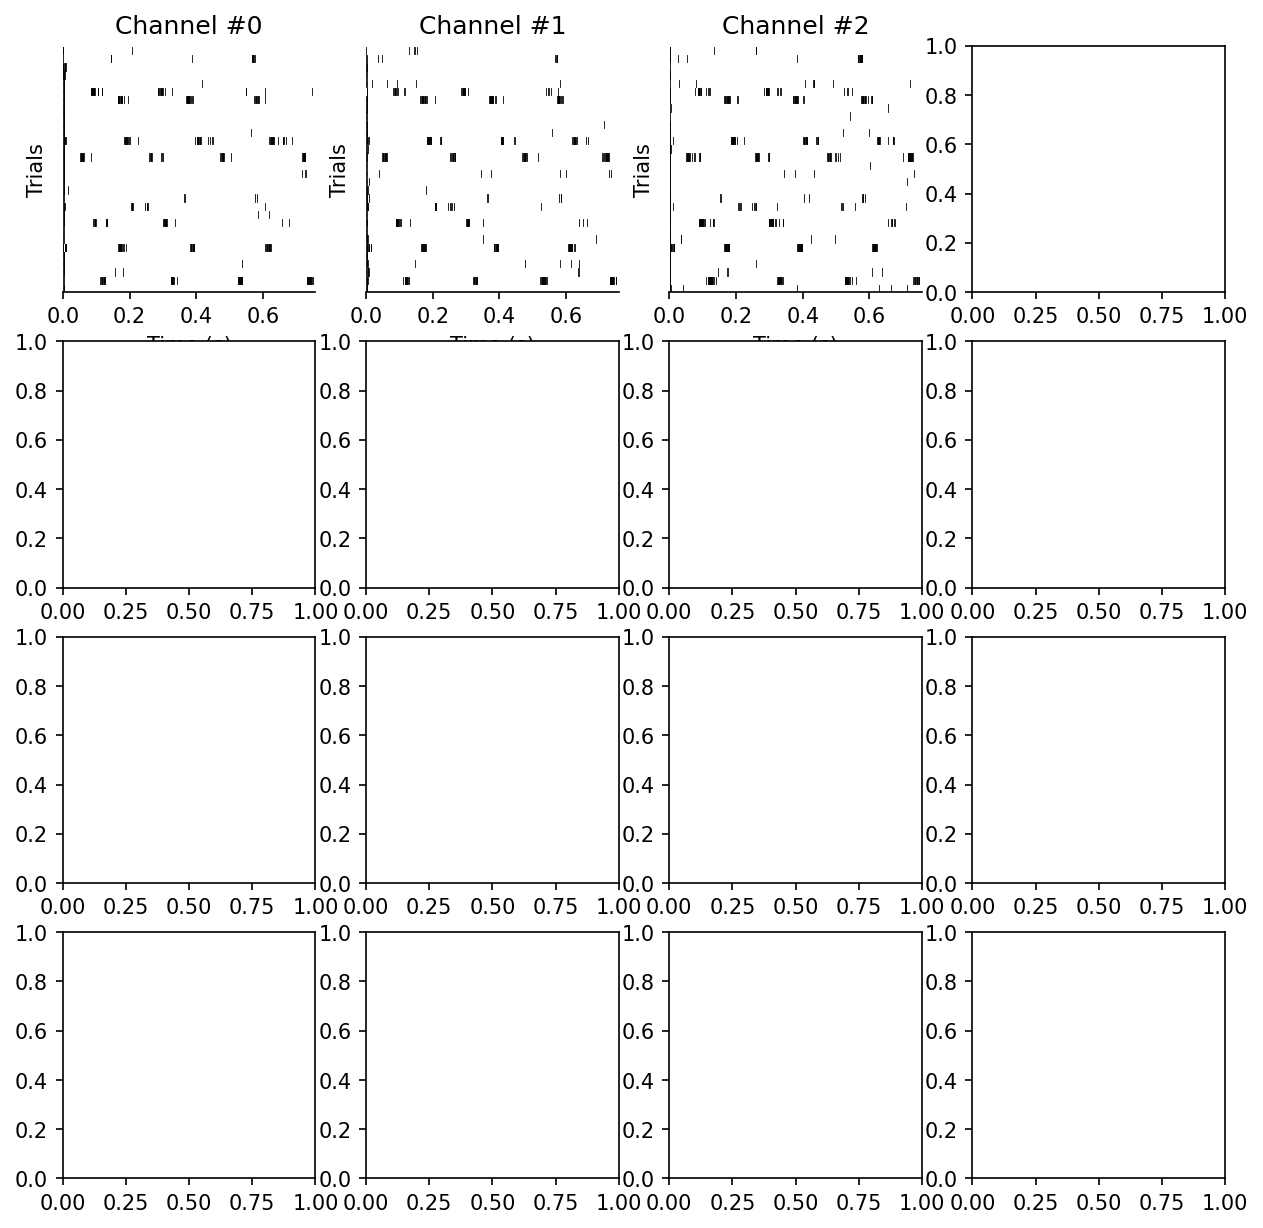

In [26]:
n_cols = 4
n_rows = int(np.ceil(n_channels / n_cols))
fig, axs = ns.visualization.pyplot.subplots(n_rows, n_cols, figsize=(10, 10), dpi=150)

for channel in np.arange(n_channels):
    spike_train_trials = spike_trains[conditions_idx, areas_idx, channel, :, 0:trial_samples]
    spikes_idxs = []
    for idx in np.arange(np.size(spike_train_trials, 0)):
        spikes_idxs.append(ns.utils.convert_spike_train_to_spikes_idxs(spike_train_trials[idx]))

    row = int(np.floor(channel / n_cols))
    col = channel % n_cols

    # TODO: se un trial non ha spike la funzione plot_spike_train crasha male: risolvere!!!!
    if (row == 0 and col == 3): 
        for trial_idx in np.arange(n_stimuli):
            print(spikes_idxs[trial_idx])

    ns.visualization.plot_spike_train(spikes_idxs, sampling_time=sampling_time, ax=axs[row, col], title='Channel #' + str(channel), channel_labels=None, ylabel='Trials', reverse=True, vertical_spacing=0.1, linewidth=0.4)

ns.visualization.pyplot.tight_layout()